#CREDIT CARD FRAUD DETECTION

###IMPORTING THE LIBRARIES

In [900]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE

Loading the dataset

In [901]:
data = pd.read_csv("/content/training_data.csv")
labels = pd.read_csv("/content/train_data_classlabels.csv")

In [902]:
X = data
Y = labels

Data infromation

In [903]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57116 entries, 0 to 57115
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57116 non-null  int64  
 1   V1      57116 non-null  float64
 2   V2      57116 non-null  float64
 3   V3      57116 non-null  float64
 4   V4      57116 non-null  float64
 5   V5      57116 non-null  float64
 6   V6      57116 non-null  float64
 7   V7      57116 non-null  float64
 8   V8      57116 non-null  float64
 9   V9      57116 non-null  float64
 10  V10     57116 non-null  float64
 11  V11     57116 non-null  float64
 12  V12     57116 non-null  float64
 13  V13     57116 non-null  float64
 14  V14     57116 non-null  float64
 15  V15     57116 non-null  float64
 16  V16     57116 non-null  float64
 17  V17     57116 non-null  float64
 18  V18     57116 non-null  float64
 19  V19     57116 non-null  float64
 20  V20     57116 non-null  float64
 21  V21     57116 non-null  float64
 22

In [904]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57116 entries, 0 to 57115
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   57116 non-null  float64
dtypes: float64(1)
memory usage: 446.3 KB


Checking for missing values

In [905]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [906]:
data.isnull().sum().sum()

0

In [907]:
labels.isnull().sum()

Class    0
dtype: int64

We have no missing values!

Checking distribution of legit and fraudulent transactions

In [908]:
labels.value_counts()

Class
0.0      56974
1.0        142
dtype: int64

Text(0, 0.5, 'Frequency')

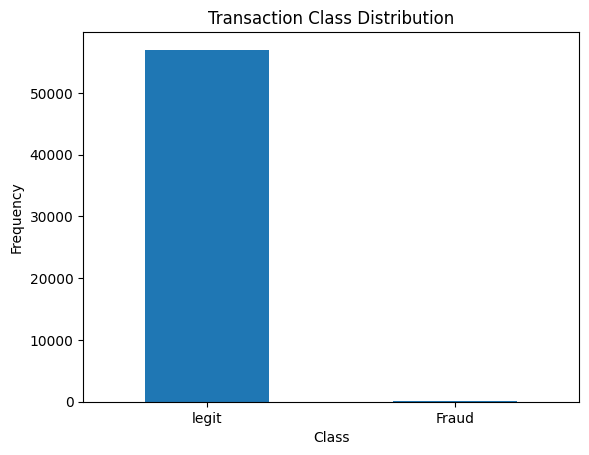

In [909]:
count_classes = labels.value_counts()
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ["legit","Fraud"])
plt.xlabel("Class")
plt.ylabel("Frequency")

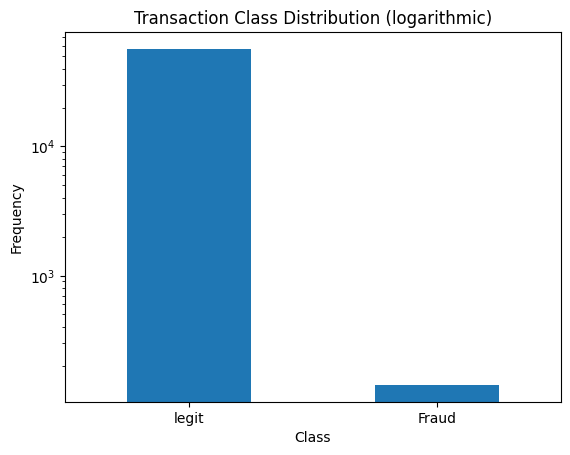

In [910]:
count_classes = labels.value_counts()
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution (logarithmic)")
plt.xticks(range(2), ["legit","Fraud"])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.yscale('log')

The data is very unbalanced!!

0 => Normal Transactions(Legit)

1 => Fraudulent Transactions

Separating the data for analysis

In [911]:
X['Class'] = Y

In [912]:
legit = X[X.Class == 0]
fraud = X[X.Class ==1]

In [913]:
print("Fraud Cases : {}".format(len(fraud)))

print("Legit Cases : {}".format(len(legit)))

Fraud Cases : 142
Legit Cases : 56974


Stastical measures

In [914]:
legit.Amount.describe()

count    56974.000000
mean        96.947941
std        270.511706
min          0.000000
25%          7.610000
50%         26.315000
75%         87.935000
max      19656.530000
Name: Amount, dtype: float64

In [915]:
fraud.Amount.describe()

count     142.000000
mean       94.179930
std       227.637806
min         0.000000
25%         1.000000
50%         3.860000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

Comparing the values

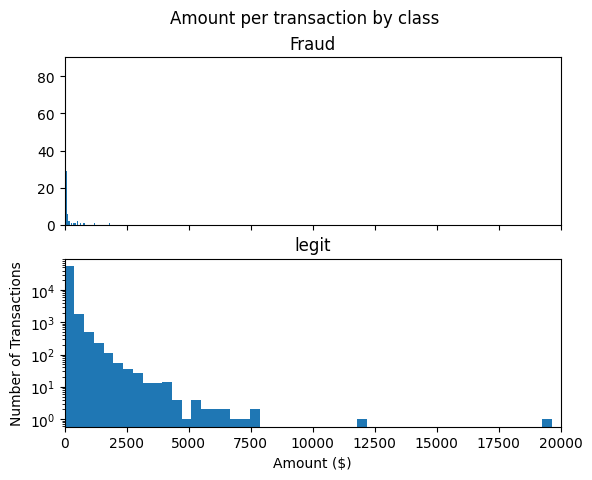

In [916]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(legit.Amount, bins = bins)
ax2.set_title('legit')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

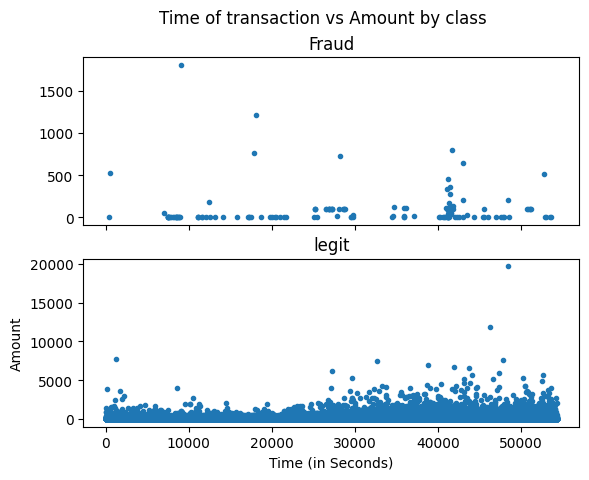

In [917]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount, marker='.')
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount, marker='.')
ax2.set_title('legit')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [918]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,34996.197195,-0.231008,-0.034844,0.704876,0.156111,-0.257629,0.105005,-0.093744,0.04454,0.021640,...,0.043223,-0.031459,-0.106587,-0.037273,0.006573,0.134248,0.021278,0.001243,0.001023,96.947941
1.0,29734.647887,-6.983068,5.108252,-9.589043,5.544330,-5.168831,-2.231451,-7.328468,3.65638,-3.290294,...,0.425579,0.830120,-0.245639,-0.287868,-0.080482,0.278531,0.123823,0.627499,0.063417,94.179930


In [919]:
data = pd.read_csv("/content/training_data.csv")
labels = pd.read_csv("/content/train_data_classlabels.csv")

In [920]:
X = data
Y = labels

Feature Selection

1. Based on variance

In [921]:
var_thresh = VarianceThreshold(threshold=0)
var_thresh.fit(X)

VarianceThreshold(threshold=0)

In [922]:
# Finding non-constant feature
sum(var_thresh.get_support())

30

We got 30 out of 30 colmumns.
All columns are non-constant

2. Based on correlation

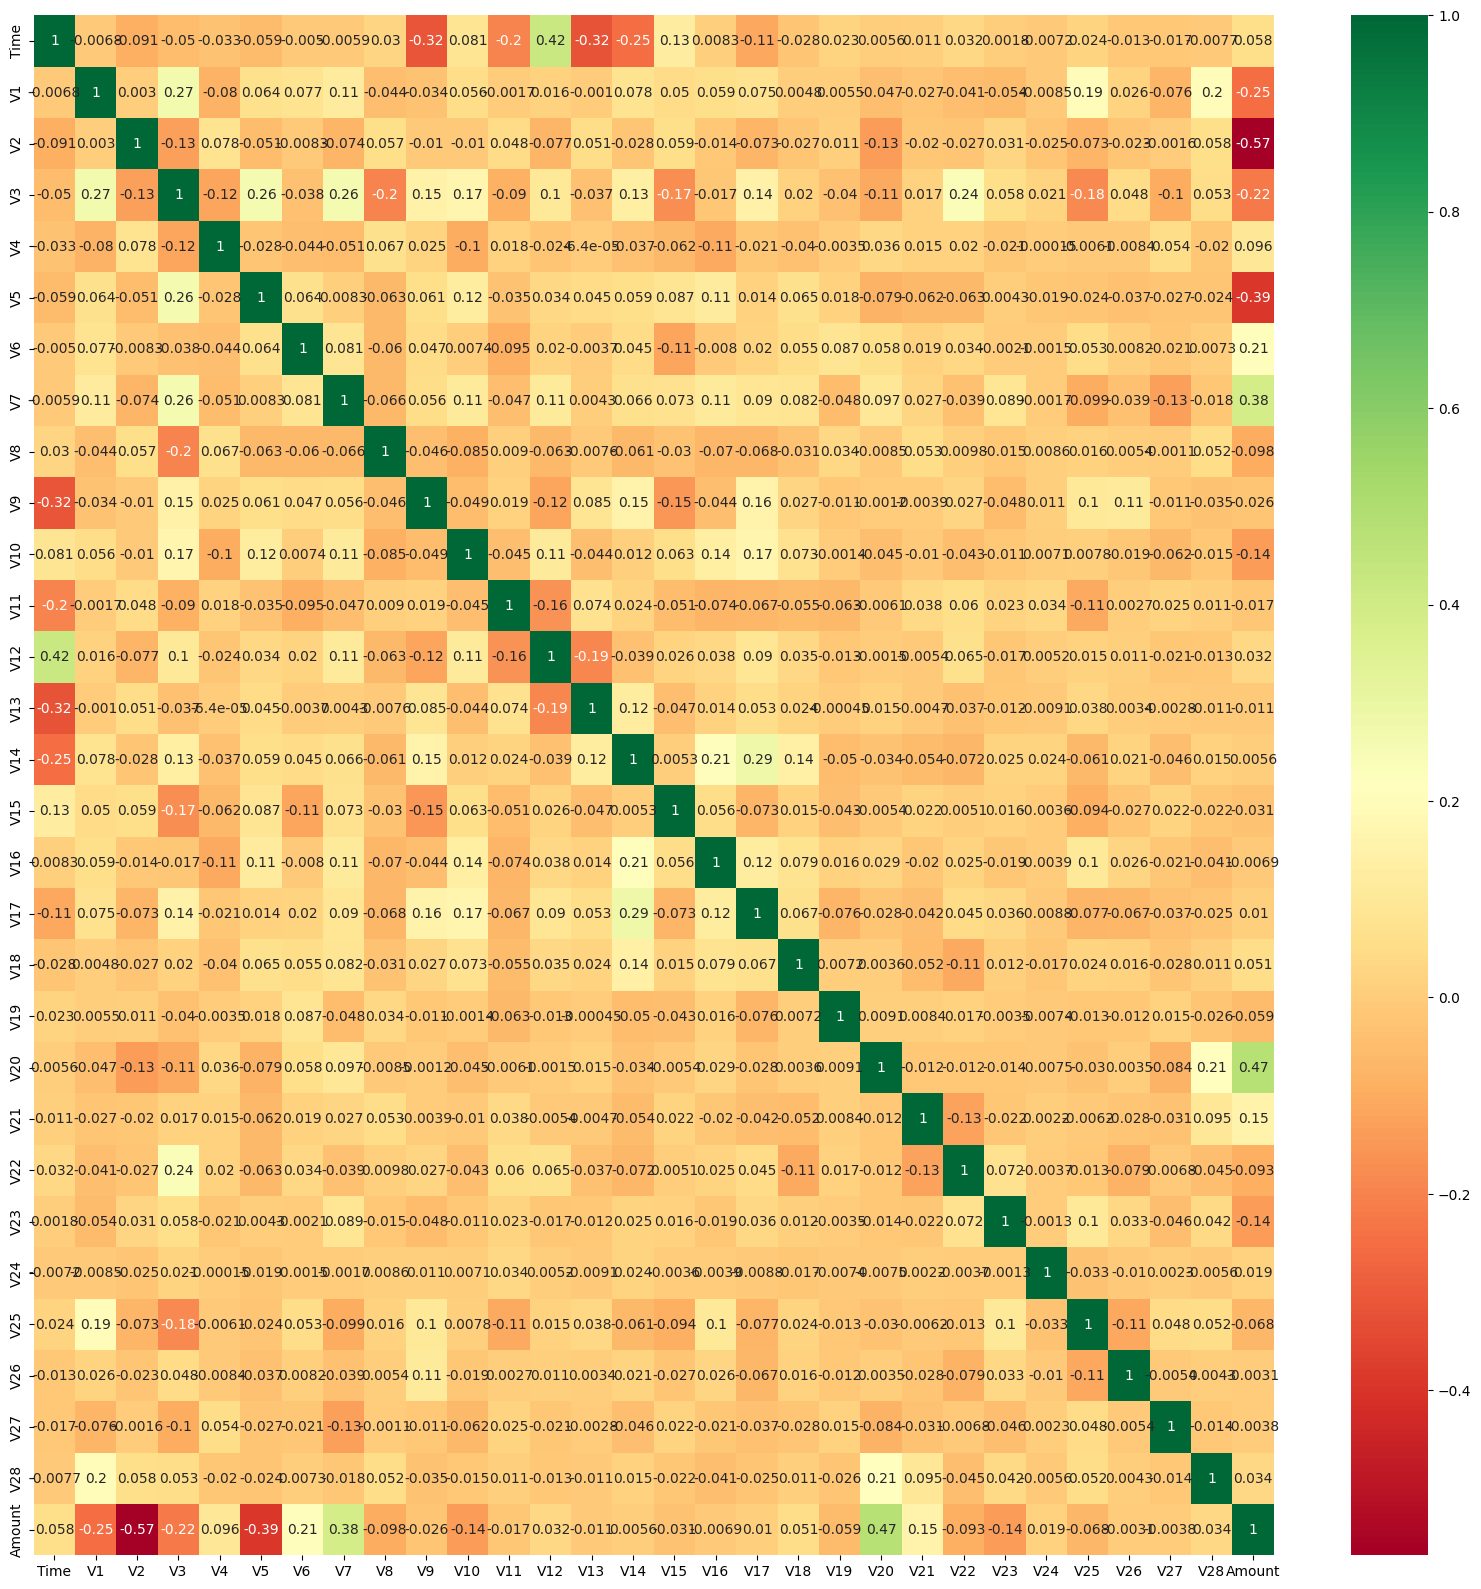

In [923]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [924]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(len(corr_matrix.columns)):
            if (corr_matrix.iloc[i,j])>threshold:
                if (i!=j):
                    colname = corr_matrix.columns[i]
                    col_corr.add(colname)
    return col_corr

In [925]:
corr_features = correlation(X, 0.5)
len(set(corr_features))

0

No features are highly correlated (>0.5). So no dropping of feature here.

3. Based on Information gain

In [926]:
mutual_info = mutual_info_classif(X, Y)
mutual_info

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.00286153, 0.00433563, 0.00654513, 0.0085178 , 0.00960014,
       0.00494574, 0.00608339, 0.00738612, 0.00414371, 0.0083987 ,
       0.01157103, 0.01153316, 0.01192166, 0.00038406, 0.0125718 ,
       0.00037575, 0.00964863, 0.01203072, 0.0079112 , 0.00260219,
       0.00225364, 0.0055607 , 0.00015525, 0.00128359, 0.00087225,
       0.00183051, 0.00152038, 0.00511019, 0.00375205, 0.00314368])

In [927]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

V14       0.012572
V17       0.012031
V12       0.011922
V10       0.011571
V11       0.011533
V16       0.009649
V4        0.009600
V3        0.008518
V9        0.008399
V18       0.007911
V7        0.007386
V2        0.006545
V6        0.006083
V21       0.005561
V27       0.005110
V5        0.004946
V1        0.004336
V8        0.004144
V28       0.003752
Amount    0.003144
Time      0.002862
V19       0.002602
V20       0.002254
V25       0.001831
V26       0.001520
V23       0.001284
V24       0.000872
V13       0.000384
V15       0.000376
V22       0.000155
dtype: float64

<Axes: >

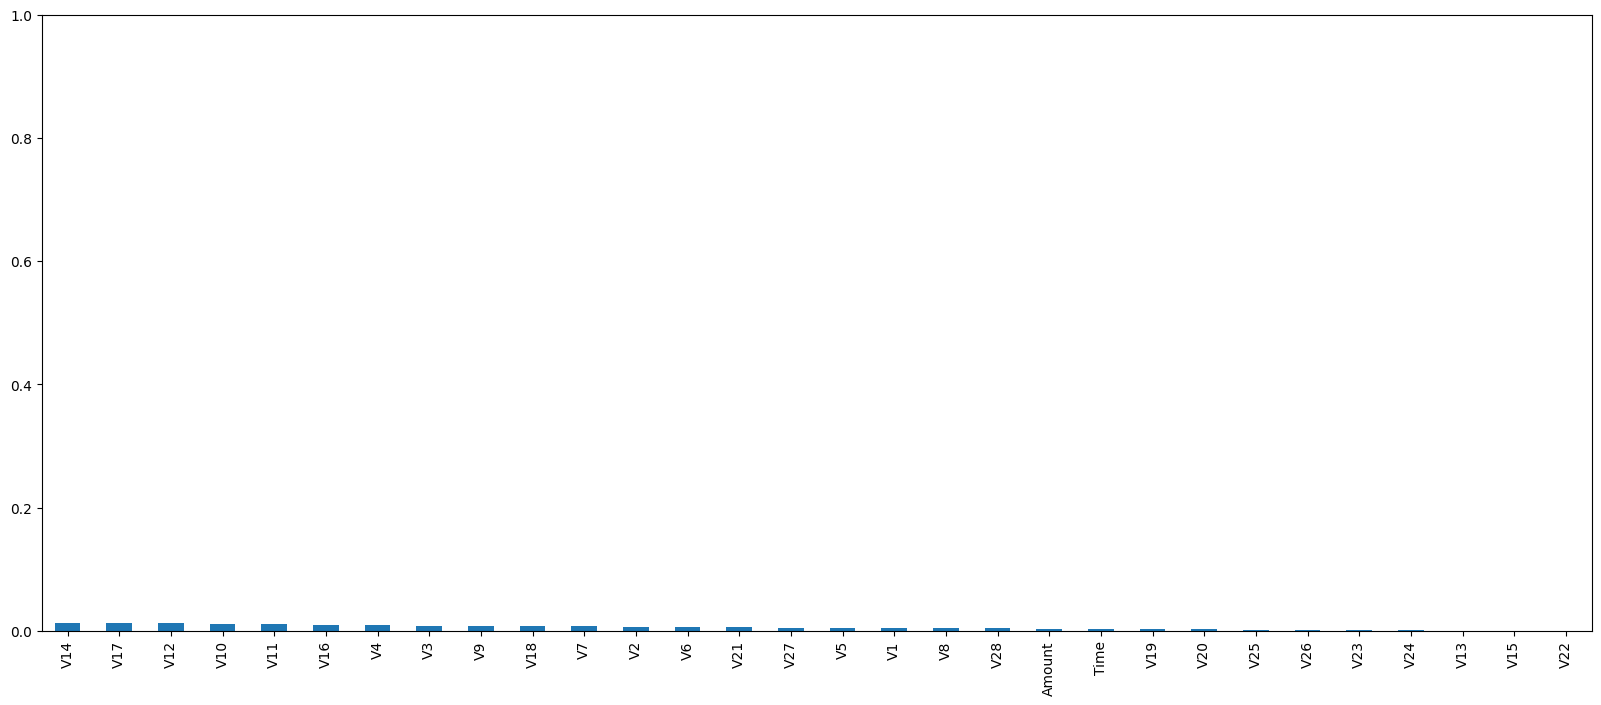

In [928]:
# Plot
mutual_info.sort_values(ascending=False).plot(kind='bar',figsize=(20,8),ylim=(0,1))

All values are low, so we will select all features

After using this many feature selection techniques too, we didnt get any feature that can be dropped. So all features are important. Thus, we will consider all features for the model.

The data is highly unbalanced. So we will use the technique of under-sampling to overcome the unbalanced data.

There are 142 instanced of fraud in the data, so we will sample the 142 instances of legit transactions.

SMOTE

In [929]:
sm = SMOTE(sampling_strategy='minority')
X_res, Y_res = sm.fit_resample(X, Y)

In [930]:
X_res.shape, Y_res.shape

((113948, 30), (113948, 1))

In [931]:
X_train_res, X_test_res, Y_train_res, Y_test_res = train_test_split(X_res, Y_res, test_size=0.3, stratify=Y_res, random_state=2)

Under-sampling

In [932]:
data = pd.read_csv("/content/training_data.csv")
labels = pd.read_csv("/content/train_data_classlabels.csv")

In [933]:
X = data
Y = labels

In [934]:
X['Class'] = Y

In [935]:
legit1 = X[X.Class == 0]
fraud1 = X[X.Class ==1]

In [936]:
legit1.shape,fraud1.shape

((56974, 31), (142, 31))

In [937]:
legit_sample = legit1.sample(n=142)

Concatenating both data frames

In [938]:
newdata = pd.concat([legit_sample,fraud1], axis=0)

In [939]:
newdata['Class'].value_counts()

0.0    142
1.0    142
Name: Class, dtype: int64

New data is uniformly distributed!

In [940]:
newdata.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,33860.676056,-0.577770,0.068210,0.521935,0.106315,-0.361664,-0.036142,-0.143987,0.159259,0.073918,...,-0.089289,-0.082468,-0.172318,-0.098729,0.029265,0.151067,0.054850,0.013419,-0.027055,73.675141
1.0,29734.647887,-6.983068,5.108252,-9.589043,5.544330,-5.168831,-2.231451,-7.328468,3.656380,-3.290294,...,0.425579,0.830120,-0.245639,-0.287868,-0.080482,0.278531,0.123823,0.627499,0.063417,94.179930


Splitting the new data again into features & targets

In [941]:
X_new = newdata.drop(columns = 'Class', axis = 1)
Y_new = newdata['Class']

In [942]:
print(X_new)

        Time         V1         V2         V3         V4         V5        V6  \
41985  33095  -6.227398   7.220281  -4.897833  -0.573454   1.020318  0.932223   
23844  36587  -3.669883  -2.139424  -1.484985   0.016833  -0.655260 -0.620690   
1335   34180  -0.398232   0.807036   1.618050   1.163240   0.369599  0.354416   
26940  41177  -3.685907   2.991558  -0.962688  -1.366100  -2.049199 -1.340821   
52863  27363  -0.454659   0.941535   1.445738  -0.215688   0.166780 -0.410926   
...      ...        ...        ...        ...        ...        ...       ...   
54172  53451   0.385108   1.217620  -1.953872   2.087076  -1.144225 -0.576888   
55181  48533   1.243848   0.524526  -0.538884   1.209196   0.479538 -0.197429   
55691  36170  -5.685013   5.776516  -7.064977   5.902715  -4.715564 -1.755633   
56147  21662 -18.018561  10.558600 -24.667741  11.786180 -10.564657 -2.645681   
56464  41233 -10.645800   5.918307 -11.671043   8.807369  -7.975501 -3.586806   

              V7        V8 

In [943]:
print(Y_new)

41985    0.0
23844    0.0
1335     0.0
26940    0.0
52863    0.0
        ... 
54172    1.0
55181    1.0
55691    1.0
56147    1.0
56464    1.0
Name: Class, Length: 284, dtype: float64


In [944]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size=0.3, stratify=Y_new, random_state=2)

#MODEL TRAINING

LOGISTIC REGRESSION

In [945]:
model = LogisticRegression(max_iter=1000)

In [946]:
model.fit(X_train_res,Y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [947]:
X_prediction = model.predict(X_train_res)
X_prediction_test = model.predict(X_test_res)

In [948]:
print(classification_report(X_prediction, Y_train_res))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     40511
         1.0       0.97      0.99      0.98     39252

    accuracy                           0.98     79763
   macro avg       0.98      0.98      0.98     79763
weighted avg       0.98      0.98      0.98     79763



In [949]:
print(classification_report(X_prediction_test, Y_test_res))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98     17326
         1.0       0.97      0.98      0.98     16859

    accuracy                           0.98     34185
   macro avg       0.98      0.98      0.98     34185
weighted avg       0.98      0.98      0.98     34185



We are getting very low F1-score for this smote uversampled data. Now, we will try by the undersampled data.

In [950]:
model1 = LogisticRegression(max_iter=1000)

In [951]:
model1.fit(X_new,Y_new)

LogisticRegression(max_iter=1000)

In [952]:
X_prediction1 = model.predict(X_new)
X_prediction_test1 = model.predict(X_test)

In [953]:
print(classification_report(X_prediction1, Y_new))

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       148
         1.0       0.94      0.98      0.96       136

    accuracy                           0.96       284
   macro avg       0.96      0.96      0.96       284
weighted avg       0.96      0.96      0.96       284



In [954]:
print(classification_report(X_prediction_test1, Y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        45
         1.0       0.93      0.98      0.95        41

    accuracy                           0.95        86
   macro avg       0.95      0.95      0.95        86
weighted avg       0.95      0.95      0.95        86



SVM

In [955]:
from sklearn.svm import SVC
modelsvm = SVC()

In [956]:
modelsvm.fit(X_new, Y_new)

SVC()

In [957]:
svmpred = modelsvm.predict(X_new)
svmpredtest = modelsvm.predict(X_test)

In [958]:
print(classification_report(svmpred, Y_new))

              precision    recall  f1-score   support

         0.0       0.75      0.57      0.65       185
         1.0       0.44      0.64      0.52        99

    accuracy                           0.60       284
   macro avg       0.60      0.60      0.59       284
weighted avg       0.64      0.60      0.60       284



In [959]:
print(classification_report(svmpredtest, Y_test))

              precision    recall  f1-score   support

         0.0       0.79      0.60      0.68        57
         1.0       0.47      0.69      0.56        29

    accuracy                           0.63        86
   macro avg       0.63      0.64      0.62        86
weighted avg       0.68      0.63      0.64        86



In [960]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(svmpredtest, Y_test))

[[34 23]
 [ 9 20]]


ADAPTIVE BOOSTING

In [961]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assume you have your features (X) and labels (y) ready
# Replace this with your actual dataset

# Example: X and y
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create a base weak learner (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(model, n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_new, Y_new)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_new)

# Evaluate the model
accuracy = accuracy_score(Y_new, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(Y_new, y_pred))


Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       142
         1.0       0.99      0.94      0.96       142

    accuracy                           0.96       284
   macro avg       0.96      0.96      0.96       284
weighted avg       0.96      0.96      0.96       284



In [962]:
print(confusion_matrix(y_pred, Y_new))

[[140   9]
 [  2 133]]


Hyperparameter tuning

In [963]:
param_grid =[
    {'penalty' : ['l1','l2','elasticnet','none'],
     'C' : np.logspace(-4,4,20),
     'solver' : ['lbfgs', 'newton-cg','liblinear','sag','saga'],
     'max_iter' : [1000,2000,5000]
     }
]

In [964]:
clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose = True, n_jobs = -1)

In [ ]:
best_clf = clf.fit(X_new,Y_new)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


In [ ]:
X_prediction_hypertuning= best_clf.predict(X_new)

In [ ]:
X_pred_test_hypertuning = best_clf.predict(X_test)

In [ ]:
print(classification_report(X_prediction_hypertuning, Y_new))

In [ ]:
print(classification_report(X_pred_test_hypertuning, Y_test))

In [ ]:
print(confusion_matrix(X_pred_test_hypertuning, Y_test))

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [ ]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_test, X_pred_test_hypertuning)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()